In [30]:
import numpy as np
import matplotlib.pyplot as pp
pp.rcParams.update({'font.size': 14})
pp.rcParams['figure.figsize'] = [10, 5]

In [31]:
def upwind(u0,x0,x1,T,a,N,M):
    import numpy as np
    from scipy import sparse
    h = (x1-x0)/N
    k = T/M
    x = np.linspace(x0,x1,N+1)
    u = np.zeros((N+1,M+1))
    u[:,0] = u0(x)
    B = np.zeros((2,N))
    B[0,:] = 1-a/h*k
    B[1,:] = a/h*k
    B = sparse.spdiags(B,[0,-1],N,N)
    for k in range(1,M+1):
        u_prev = u[1:,k-1]
        u_next = B.dot(u_prev)
        u[1:,k] = u_next
    return (x,u)

In [32]:
def laxwendroff(u0,x0,x1,T,a,N,M):
    import numpy as np
    from scipy import sparse
    h = (x1-x0)/N
    k = T/M
    x = np.linspace(x0,x1,N+1)
    u = np.zeros((N+1,M+1))
    u[:,0] = u0(x)
    B = np.zeros((3,N+1))
    lam = (a*k/h)
    B[0,:] = (lam*lam -lam)/2
    B[1,:] = 1-lam*lam
    B[2,:] = (lam*lam + lam)/2

    # Right-hand side by upwinding
    B[1,N] = 1-lam
    B[2,N-1] = lam

    B = sparse.spdiags(B,[1,0,-1],N+1,N+1)
    for k in range(1,M+1):
        u_prev = u[:,k-1]
        u[:,k] = B.dot(u_prev)
    return (x,u)

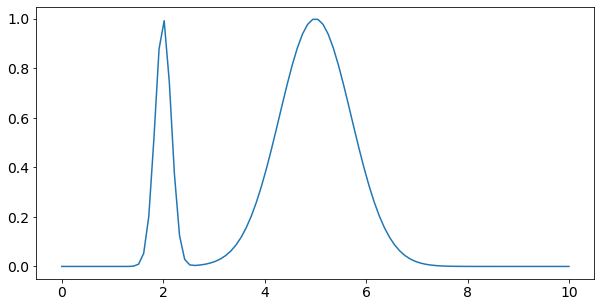

In [33]:
u0=lambda x: np.exp(-20*(x-2)**2)+ np.exp(-(x-5)**2)
x=np.linspace(0,10,100)
pp.plot(x,u0(x))

In [12]:
def bumps(h,solver):
    import numpy as np
    u0=lambda x: np.exp(-20*(x-2)**2)+ np.exp(-(x-5)**2)
    u_exact = lambda x, t: u0(x-t)


    x0=0; x1=25
    T=17
    N=int( (x1-x0)/h )
    k=0.8*h; M = int( T/k )
    a = 1
    (x,u) = solver(u0, x0, x1, T, a, N, M)
    pp.plot(x,u[:,-1],x, u_exact(x,T))

    pp.xlim(15,25)
    pp.ylim(-0.5,1.5)

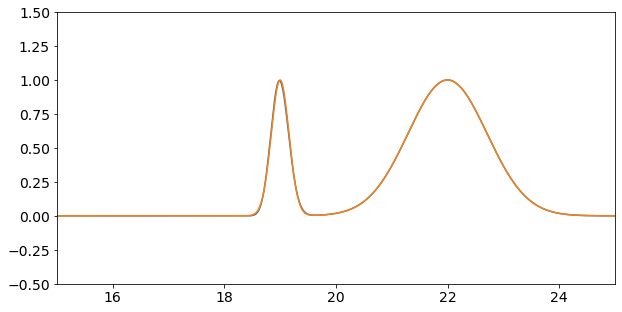

In [50]:
h=0.01
#bumps(h,solver=upwind)
bumps(h,solver=laxwendroff)

In [21]:
def block(h,lam,solver):
    import numpy as np
    u0=lambda x: ((x>=0) & (x<=1))*1.0
    u_exact = lambda x, t: u0(x-t)

    x0=0; x1=10
    T=7
    a = 1
    
    N = int((x1-x0)/h)
    k = lam*h/a; M = int(T/k) 
    
    (x,u) = solver(u0, x0, x1, T, a, N, M)
    pp.plot(x,u[:,-1],x, u_exact(x,T))
    pp.xlim(0,10)
    pp.ylim(-0.5,1.5)

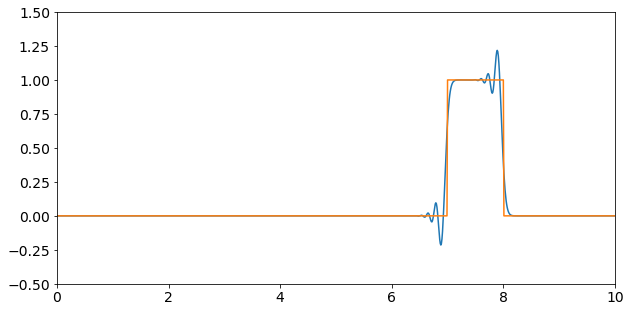

In [29]:
#block(h=0.01,lam=0.8,solver=upwind)
block(h=0.01,lam=0.8,solver=laxwendroff)

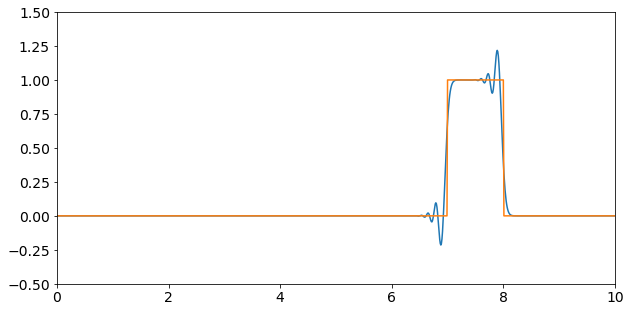

In [128]:
block(h=0.01,lam=0.8,solver=laxwendroff)